# Classification of Leukaemia by Gene Expression

## Import Libraries

In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import seaborn as sns

## Import Data

In [67]:
# Training Dataset
training_data = pd.read_csv('Data/data_set_ALL_AML_train.csv')
training_data.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [68]:
# Labels for the Training Set
labels = pd.read_csv('Data/actual.csv')
labels.head()

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [69]:
# Test Dataset
test_data = pd.read_csv('Data/data_set_ALL_AML_independent.csv')
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


## Exploration of Data

### Re-Formatting of Data

In [70]:
# Training Dataset

training_df = training_data.copy()

#Putting the columns in the correct order
prev_col = None
col_renaming_map = {}
for col in training_df.columns:
    if (col == 'Gene Description' or col == 'Gene Accession Number'):
        continue
    if (re.match('^\d+$', col)):
        prev_col = col
        continue
    col_renaming_map[col] = f'call.{prev_col}'
training_df.rename(columns = col_renaming_map, inplace=True)

training_df.head()

,Gene Description,Gene Accession Number,1,call.1,2,call.2,3,call.3,4,call.4,...,29,call.29,30,call.30,31,call.31,32,call.32,33,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [71]:
# Test Dataset

test_df = test_data.copy()

#Putting the columns in the correct order
prev_col = None
col_renaming_map = {}
for col in test_df.columns:
    if (col == 'Gene Description' or col == 'Gene Accession Number'):
        continue
    if (re.match('^\d+$', col)):
        prev_col = col
        continue
    col_renaming_map[col] = f'call.{prev_col}'
test_df.rename(columns = col_renaming_map, inplace=True)

test_df.head()

,Gene Description,Gene Accession Number,39,call.39,40,call.40,42,call.42,47,call.47,...,65,call.65,66,call.66,63,call.63,64,call.64,62,call.62
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [72]:
# Saving the patients for later use
patients_in_train = pd.to_numeric(training_data[[col for col in training_data.columns if re.match('^\d+$', col)]].columns).sort_values()
patients_in_test = pd.to_numeric(test_data[[col for col in test_data.columns if re.match('^\d+$', col)]].columns).sort_values()

print(patients_in_train)
print(patients_in_test)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38],
      dtype='int64')
Index([39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72],
      dtype='int64')


### Merge all Data

In [73]:
df = pd.merge(training_df, 
                    test_df, 
                    on=['Gene Description', 'Gene Accession Number'], 
                    how='outer')

### Final Reshaping of Data

In [74]:
call_columns = [col for col in df.columns if col.startswith('call')]
melted_calls = df.melt(id_vars=['Gene Description', 'Gene Accession Number'],
                      value_vars=call_columns,
                      var_name='call',
                      value_name='call_val')
melted_calls['call'] = melted_calls['call'].replace('call.', '', regex=True)
melted_calls['call'] = pd.to_numeric(melted_calls['call'])

pt_columns = [col for col in all_data.columns if col.isdigit()]
melted_pt = df.melt(id_vars=['Gene Description', 'Gene Accession Number'],
                   value_vars=pt_columns,
                   var_name='pt',
                   value_name='expr')
melted_pt['pt'] = pd.to_numeric(melted_pt['pt'])

gene_pt_calls = pd.merge(melted_pt, 
                         melted_calls, 
                         left_on=['Gene Description', 'Gene Accession Number'],
                         right_on=['Gene Description', 'Gene Accession Number'],
                        how='left')

# Add Labels
gene_pt_calls = pd.merge(gene_pt_calls, labels, left_on='pt', right_on='patient', how='left')

gene_pt_calls

,Gene Description,Gene Accession Number,pt,expr,call,call_val,patient,cancer
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,1,-214,1,A,1,ALL
1,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,1,-214,2,A,1,ALL
2,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,1,-214,3,A,1,ALL
3,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,1,-214,4,A,1,ALL
4,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,1,-214,5,A,1,ALL
...,...,...,...,...,...,...,...,...
36956731,GB DEF = mRNA (clone 1A7),Z78285_f_at,62,-60,65,A,62,AML
36956732,GB DEF = mRNA (clone 1A7),Z78285_f_at,62,-60,66,A,62,AML
36956733,GB DEF = mRNA (clone 1A7),Z78285_f_at,62,-60,63,A,62,AML
36956734,GB DEF = mRNA (clone 1A7),Z78285_f_at,62,-60,64,A,62,AML


- Gene Description: This column contains a description of the gene
- Gene Accession Number: This column contains the unique identifier for each gene
- pt: This columns contains the patient number
- expr:
- call:
- call_val:This column is an assessment of the presence or absence of gene expression based on the signal intensity for each gene in each sample - "Present" (P), "Absent" (A), and "Marginal" (M)
- patient: This columns also contains the patient number
- cancer: This column indicates the type of cancer for each patient

### Distribution of Call Values

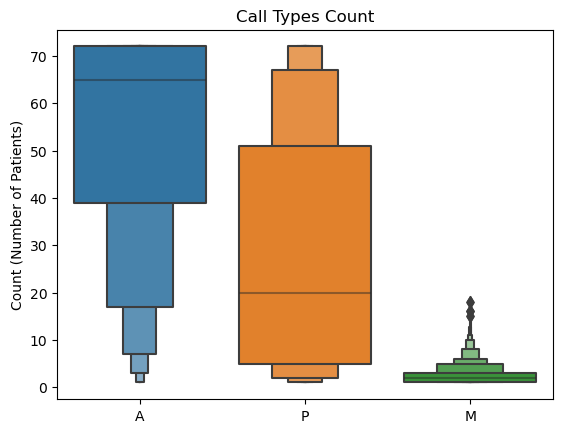

In [75]:
gene_calls = melted_calls.groupby(['Gene Description', 'Gene Accession Number'])['call_val'].value_counts().reset_index(name='count')

sns.boxenplot(data=gene_calls, x='call_val', y='count')
plt.title('Call Types Count')
plt.xlabel('')
plt.ylabel('Count (Number of Patients)')

plt.show()

The distribution for the Absent (A) genes are heavily skewed.
### Distribution of Classes

In [77]:
classes_count = labels.groupby('cancer')['patient'].nunique()
classes_count

cancer
ALL    47
AML    25
Name: patient, dtype: int64

The classes are very imbalanced.

## Feature Selection